In [40]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten
from tensorflow.keras.callbacks import (EarlyStopping,
                                        TensorBoard,ModelCheckpoint,
                                        ReduceLROnPlateau,LearningRateScheduler)
from tensorflow.keras.callbacks  import Callback
from tensorflow.keras.utils import to_categorical as to_cat

import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd


# just ignore warnings
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
import tensorflow as tf 
tf.get_logger().setLevel('ERROR') 

**Idea of execution**
- I have covered six callbacks  (five +  one custom ) : (early_stopping,reduce_lr_on_plat,tensorboard,model_checkpoint,scheduler)
- u can check more checkpoints at : https://keras.io/api/callbacks/
- then there are custom callbacks (very easy) : https://keras.io/guides/writing_your_own_callbacks/

NOTE : I have not much focused on model building and acc just callabacks

In [21]:
(x_train, y_train), (x_test, y_test) =  cifar10.load_data()
x_train  =  x_train /255.0
x_test =  x_test / 255.0
y_train = to_cat(y_train,10)
y_test =  to_cat(y_test,10)

In [28]:
def fit_model(callback,epochs=10):
    
    model = Sequential([
    Conv2D(32,(3,3),activation="relu",input_shape=(32,32,3)),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation="softmax")
    ])
    model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["acc"])
    history = model.fit(x_train,y_train,epochs=epochs,callbacks=[callback],validation_data=(x_test,y_test))
    return history
    

def plot_history(history):
    plt.style.use("ggplot")
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.legend(["train", "val"],loc='upper left')


    

#### 1)  Early stopping 
**Stop training when a monitored metric has stopped improving.** <br />
full docs : https://keras.io/api/callbacks/early_stopping/

In [17]:
early_stop =  EarlyStopping(
    monitor="val_loss",
    patience=3,
    restore_best_weights=True
)

Epoch 1/5
1563/1563 [==============================] - 41s 24ms/step - loss: 1.5056 - acc: 0.4574 - val_loss: 1.2422 - val_acc: 0.5618
Epoch 2/5
1563/1563 [==============================] - 40s 26ms/step - loss: 1.1779 - acc: 0.5836 - val_loss: 1.0832 - val_acc: 0.6184
Epoch 3/5
1563/1563 [==============================] - 34s 22ms/step - loss: 1.0533 - acc: 0.6297 - val_loss: 1.0426 - val_acc: 0.6323
Epoch 4/5
1563/1563 [==============================] - 32s 21ms/step - loss: 0.9774 - acc: 0.6571 - val_loss: 1.0165 - val_acc: 0.6438
Epoch 5/5
1563/1563 [==============================] - 33s 21ms/step - loss: 0.9219 - acc: 0.6769 - val_loss: 0.9742 - val_acc: 0.6645


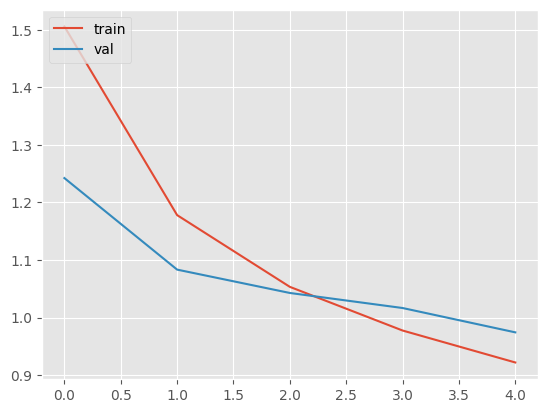

In [22]:
history_early =  fit_model(early_stop,5)
plot_history(history_early)

#### 2)  Reduce LR on plateau 
**Reduce learning rate when a metric has stopped improving.** <br />
full docs:https://keras.io/api/callbacks/reduce_lr_on_plateau/

In [23]:
reduce_lr =  ReduceLROnPlateau(
    monitor="val_loss",
    patience=2,
    factor=0.2, # reduce by 20%
    min_lr=1e-6
  
)

Epoch 1/5
1563/1563 [==============================] - 39s 22ms/step - loss: 1.5219 - acc: 0.4523 - val_loss: 1.2906 - val_acc: 0.5445 - lr: 0.0010
Epoch 2/5
1563/1563 [==============================] - 34s 22ms/step - loss: 1.1960 - acc: 0.5794 - val_loss: 1.1141 - val_acc: 0.6102 - lr: 0.0010
Epoch 3/5
1563/1563 [==============================] - 43s 28ms/step - loss: 1.0547 - acc: 0.6304 - val_loss: 1.0218 - val_acc: 0.6463 - lr: 0.0010
Epoch 4/5
1563/1563 [==============================] - 38s 24ms/step - loss: 0.9810 - acc: 0.6583 - val_loss: 1.0262 - val_acc: 0.6394 - lr: 0.0010
Epoch 5/5
1563/1563 [==============================] - 32s 20ms/step - loss: 0.9205 - acc: 0.6793 - val_loss: 0.9768 - val_acc: 0.6592 - lr: 0.0010


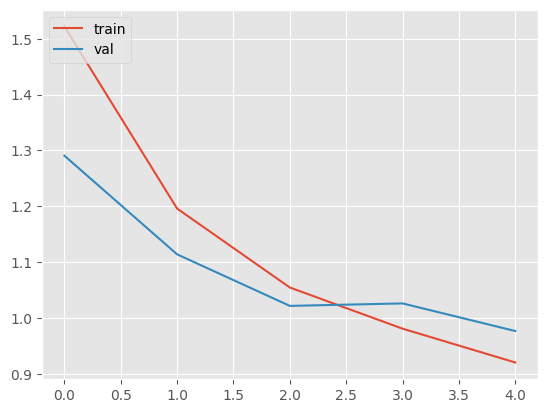

In [24]:
history_reduce =  fit_model(reduce_lr,5)
plot_history(history_reduce)

#### 3) Model Checkpoint 
**Callback to save the Keras model or model weights at some frequency.** <br />
full docs : https://keras.io/api/callbacks/model_checkpoint/

In [26]:
model_checkpoint  = ModelCheckpoint(
    filepath="./media",
    monitor='val_accuracy',
    mode='max',
    save_best_only=True
)

Epoch 1/5
1563/1563 [==============================] - 29s 17ms/step - loss: 1.4564 - acc: 0.4893 - val_loss: 1.2756 - val_acc: 0.5584
Epoch 2/5
1563/1563 [==============================] - 28s 18ms/step - loss: 1.1734 - acc: 0.5925 - val_loss: 1.1618 - val_acc: 0.5942
Epoch 3/5
1563/1563 [==============================] - 25s 16ms/step - loss: 1.0692 - acc: 0.6326 - val_loss: 1.1023 - val_acc: 0.6234
Epoch 4/5
1563/1563 [==============================] - 24s 15ms/step - loss: 1.0052 - acc: 0.6559 - val_loss: 1.0847 - val_acc: 0.6254
Epoch 5/5
1563/1563 [==============================] - 24s 15ms/step - loss: 0.9513 - acc: 0.6737 - val_loss: 1.0558 - val_acc: 0.6321


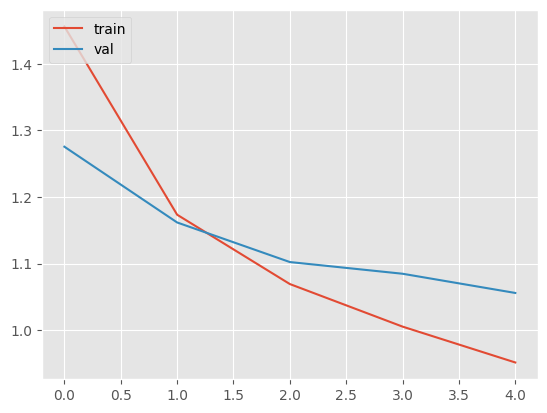

In [29]:
history_checkpoint =  fit_model(model_checkpoint,5)
plot_history(history_checkpoint)

#### 4) Learning Rate Scheduler 
**Just schedules Learning rate as per the function passed** <br />
full docs : https://keras.io/api/callbacks/learning_rate_scheduler/

In [30]:
def scheduler(epoch,lr):
    if epoch < 2:
        return lr 
    else :
        return lr * 0.1
    
scheduler_back = LearningRateScheduler(scheduler)

Epoch 1/10
1563/1563 [==============================] - 28s 17ms/step - loss: 1.4529 - acc: 0.4911 - val_loss: 1.2693 - val_acc: 0.5548 - lr: 0.0010
Epoch 2/10
1563/1563 [==============================] - 25s 16ms/step - loss: 1.1792 - acc: 0.5922 - val_loss: 1.1834 - val_acc: 0.5896 - lr: 0.0010
Epoch 3/10
1563/1563 [==============================] - 28s 18ms/step - loss: 1.0219 - acc: 0.6510 - val_loss: 1.1126 - val_acc: 0.6112 - lr: 1.0000e-04
Epoch 4/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.9966 - acc: 0.6626 - val_loss: 1.1062 - val_acc: 0.6146 - lr: 1.0000e-05
Epoch 5/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.9942 - acc: 0.6633 - val_loss: 1.1055 - val_acc: 0.6140 - lr: 1.0000e-06
Epoch 6/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.9938 - acc: 0.6639 - val_loss: 1.1055 - val_acc: 0.6139 - lr: 1.0000e-07
Epoch 7/10
1563/1563 [==============================] - 24s 15ms/step - loss: 0.9938 - acc

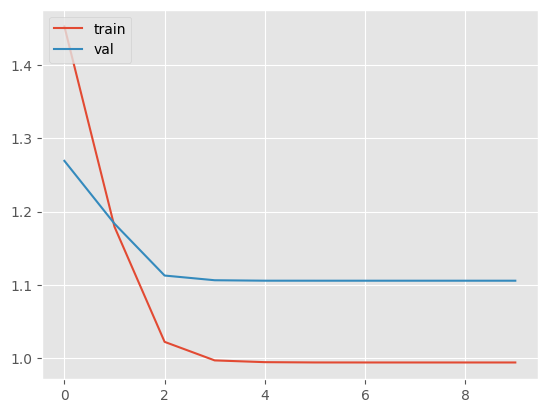

In [31]:
history_scheduler = fit_model(scheduler_back,5)
plot_history(history_scheduler)

#### 5) TensorBoard 
**TensorBoard is a visualization tool provided with TensorFlow. A TensorFlow installation is required to use this callback.** <br />
full docs : https://keras.io/api/callbacks/tensorboard/

In [32]:
tensorboard_callback =  TensorBoard("./logs")

Epoch 1/5
1563/1563 [==============================] - 9s 5ms/step - loss: 1.4768 - acc: 0.4818 - val_loss: 1.2712 - val_acc: 0.5590
Epoch 2/5
1563/1563 [==============================] - 11s 7ms/step - loss: 1.1939 - acc: 0.5850 - val_loss: 1.1702 - val_acc: 0.5877
Epoch 3/5
1563/1563 [==============================] - 11s 7ms/step - loss: 1.0957 - acc: 0.6210 - val_loss: 1.1602 - val_acc: 0.5960
Epoch 4/5
1563/1563 [==============================] - 11s 7ms/step - loss: 1.0298 - acc: 0.6431 - val_loss: 1.1098 - val_acc: 0.6140
Epoch 5/5
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9819 - acc: 0.6600 - val_loss: 1.0745 - val_acc: 0.6288


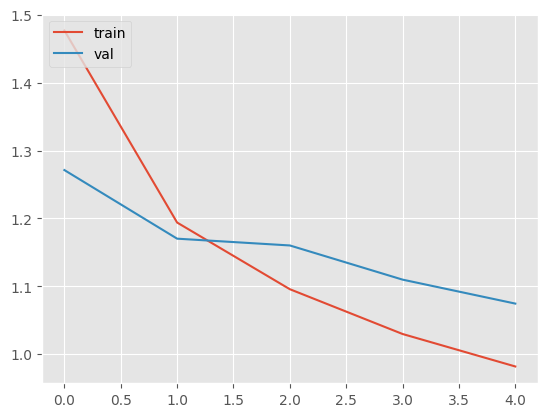

In [33]:
history_tensor =  fit_model(tensorboard_callback,5)
plot_history(history_tensor)

**Display TensorBoard**

In [39]:
## %load_ext tensorboard ## to load tensorboard in ipython

%tensorboard --logdir logs/validation/

Reusing TensorBoard on port 6008 (pid 21180), started 0:01:14 ago. (Use '!kill 21180' to kill it.)

#### 6) Custom Callback (one)
full docs : above  in Idea Execution

In [48]:
class CustomCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        # keys = list(logs.keys())
        # print("End epoch {} of training; got log keys: {}".format(epoch, keys))
        val_acc = logs.get("val_acc")
        if val_acc > 0.55 :
            print("ACCURACY REACHED ABOVE 55%")
            self.model.stop_training =  True

Epoch 1/5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4895 - acc: 0.4781 - val_loss: 1.3307 - val_acc: 0.5326
Epoch 2/5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2233 - acc: 0.5745 - val_loss: 1.2342 - val_acc: 0.5733


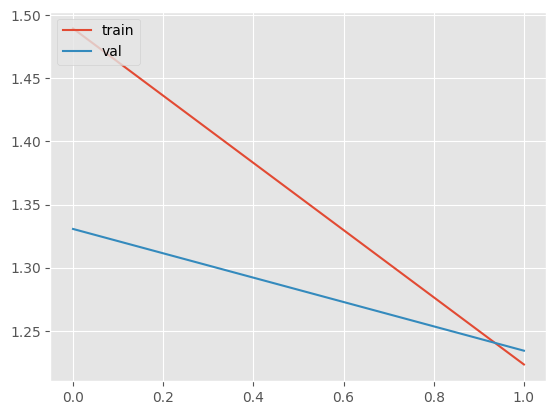

In [50]:
history_custom  = fit_model(CustomCallback(),5)
plot_history(history_custom)